## Diabetes Prediction using Logistic Regression

### 1. Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

### 2. Load the Dataset

In [46]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 3. Data Cleaning & Preprocessing

#### Columns where zero is not a valid value

In [47]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

#### Replace 0 with NaN

In [48]:
df.fillna(df.median(), inplace=True)

#### Split features and target

In [49]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#### Standardize features

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train-test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model Training

In [56]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 5. Predictions and Evaluation

In [53]:
y_pred = model.predict(X_test)

#### Confusion matrix

In [54]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[82 17]
 [21 34]]


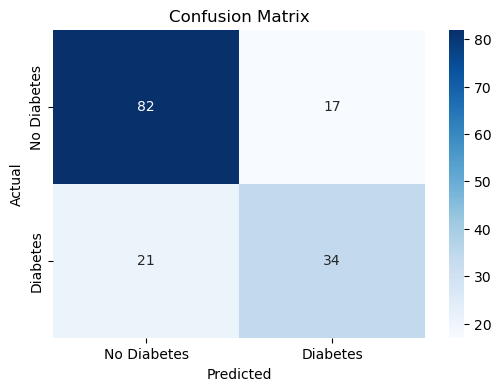

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 6. Summary
#### - We trained a logistic regression model on the diabetes dataset.
#### - Preprocessing included replacing invalid zero values and scaling.
#### - Accuracy was around 75%, which is a solid baseline.
#### - Confusion matrix shows good performance but recall can be improved.